In [1]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

import nltk 
import os
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import pandas as pd 



In [2]:
TEXT_FOLDER_PATH = 'C:/Users/Mayank/Desktop/MInor 2/XP'

if __name__ == "__main__":
    text_files = os.listdir(TEXT_FOLDER_PATH)
    inp_map = {'text_content': []}
    for texts in text_files:
        with open(os.path.join(TEXT_FOLDER_PATH, texts), encoding='utf8') as file:
            inp_map['text_content'].append(file.read())
            file.close()    
    df1 = pd.DataFrame(inp_map)
    
    df1['File Name']= text_files
    
    
    
year_List=[]
for x in df1['File Name']:
    year_List.append(x[14:18])
df1['Year']=year_List

class_List=[]
for x in df1['File Name']:
    class_List.append(x[5:8])
df1['Class']=class_List
year_List.clear()
class_List.clear()
df1=df1[['File Name','Year','Class','text_content']]
df=df1
print(df1)

                     File Name  Year Class  \
0    0001_LSA_XP10_2010_09.txt  2010   LSA   
1    0002_ EA_XP19_2019_04.txt  2019    EA   
2    0003_LSA_XP19_2019_04.txt  2019   LSA   
3    0004_LSA_XP19_2019_04.txt  2019   LSA   
4    0005_SAF_XP19_2019_04.txt  2019   SAF   
5    0006_LSA_XP19_2019_04.txt  2019   LSA   
6    0007_LSA_XP19_2019_04.txt  2019   LSA   
7    0008_LSA_XP19_2019_08.txt  2019   LSA   
8    0009_LSA_XP19_2019_08.txt  2019   LSA   
9    0010_SAF_XP19_2019_08.txt  2019   SAF   
10   0011_ AT_XP19_2019_08.txt  2019    AT   
11   0012_SAF_XP19_2019_08.txt  2019   SAF   
12   0013_SAF_XP19_2019_08.txt  2019   SAF   
13   0014_LSA_XP19_2019_08.txt  2019   LSA   
14   0015_ AT_XP19_2019_08.txt  2019    AT   
15   0016_ EA_XP18_2018_05.txt  2018    EA   
16   0017_LSA_XP18_2018_05.txt  2018   LSA   
17   0018_LSA_XP18_2018_05.txt  2018   LSA   
18   0019_LSA_XP18_2018_05.txt  2018   LSA   
19   0020_LSA_XP18_2018_05.txt  2018   LSA   
20   0021_LSA_XP16_2016_05.txt  20

Text(0, 0.5, 'Frequency')

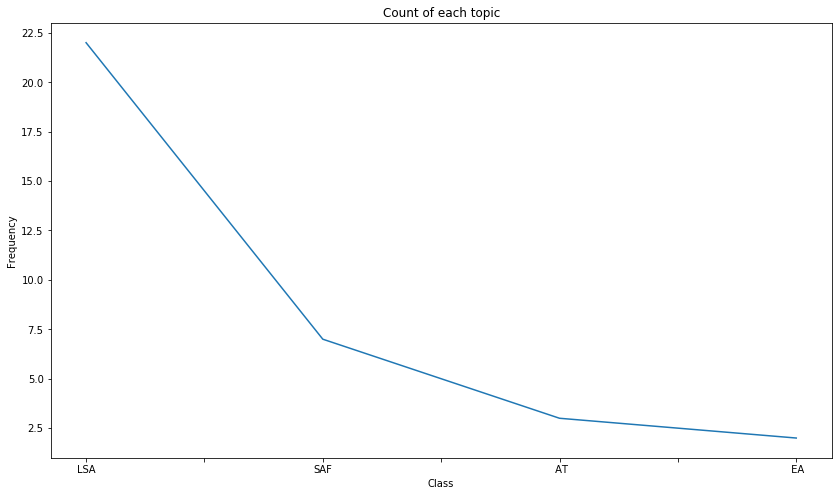

In [3]:
 
ax = df['Class'].value_counts().plot(
                                    figsize=(14,8),
                                    title="Count of each topic")
ax.set_xlabel("Class")
ax.set_ylabel("Frequency")

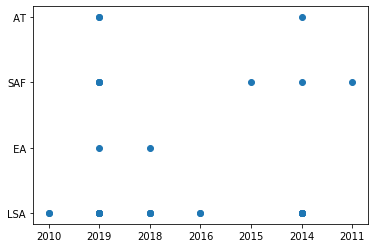

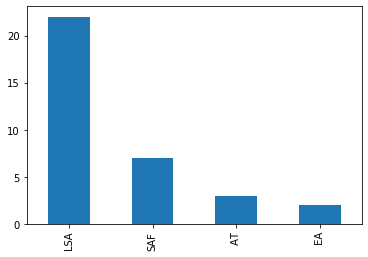

In [4]:
plt.scatter(df['Year'], df['Class']) 
plt.show()

df['Class'].value_counts().plot(kind='bar')

In [5]:
from textblob import TextBlob
def lemmatize_with_postag(sentence):
    sent = TextBlob(sentence)
    tag_dict = {"J": 'a', 
                "N": 'n', 
                "V": 'v', 
                "R": 'r'}
    words_and_tags = [(w, tag_dict.get(pos[0], 'n')) for w, pos in sent.tags]    
    lemmatized_list = [wd.lemmatize(tag) for wd, tag in words_and_tags]
    return " ".join(lemmatized_list)


In [6]:
df=df.sort_values('Year',na_position='first')
df

,File Name,Year,Class,text_content
0,0001_LSA_XP10_2010_09.txt,2010,LSA,﻿TITLE: Introducing Agile Methods in a Large S...
33,0034_LSA_XP10_2010_05.txt,2010,LSA,TITLE: Tech Challenges in a Large-Scale Agile ...
32,0033_SAF_XP11_2011_05.txt,2011,SAF,TITLE: A Case Study in Agile-at-Scale Delivery...
31,0032_LSA_XP14_2014_05).txt,2014,LSA,TITLE: Towards Principles of Large-Scale Agile...
30,0031_LSA_XP14_2014_05).txt,2014,LSA,TITLE: Characteristics and Principles of Scale...
29,0030_LSA_XP14_2014_05.txt,2014,LSA,TITLE: Architecture in Large Scale Agile Devel...
28,0029_LSA_XP14_2014_05.txt,2014,LSA,TITLE: Industrial Challenges of Scaling Agile ...
27,0028_LSA_XP14_2014_05.txt,2014,LSA,TITLE: Agile in Distress: Architecture to the ...
26,0027_ AT_XP14_2014_05.txt,2014,AT,TITLE: Supporting a Large-Scale Lean and Agile...
25,0026_SAF_XP14_2014_05.txt,2014,SAF,TITLE: A Model for Understanding When Scaling ...


In [7]:
#REMOVING STOPWORDS
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
  
stop_words = set(stopwords.words('english')) 
  

In [8]:
#STEMMING
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
   
ps = PorterStemmer() 
   


In [9]:
import string
l=[]
  
for txt in range(len(df['Year'])):
    x=df['text_content'].values[txt]
    #removing punctuation
    x=re.sub('[^A-Za-z0-9]+', ' ', x)
    #Lemmatizng
    x=lemmatize_with_postag(x)
    word_tokens = word_tokenize(x) 
    filtered_sentence = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    txt1=filtered_sentence
    txt1 = ' '.join(map(str, txt1))
    x=txt1
    #Stemming
    words = word_tokenize(x)
    stemmed=[]
    for w in words: 
         stemmed.append(ps.stem(w)) 
    stemmed = ' '.join(map(str, stemmed)) 
    x=stemmed
    l.append(x)
df['text_content']=l    
#df['text_content'].values[txt]=x;
print(df.head())

                     File Name  Year Class  \
0    0001_LSA_XP10_2010_09.txt  2010   LSA   
33   0034_LSA_XP10_2010_05.txt  2010   LSA   
32   0033_SAF_XP11_2011_05.txt  2011   SAF   
31  0032_LSA_XP14_2014_05).txt  2014   LSA   
30  0031_LSA_XP14_2014_05).txt  2014   LSA   

                                         text_content  
0   titl introduc agil method larg softwar develop...  
33  titl tech challeng larg scale agil project abs...  
32  titl A case studi agil scale deliveri abstract...  
31  titl toward principl larg scale agil develop a...  
30  titl characterist principl scale agil abstract...  


In [10]:
#Bigrams and Trigrams
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = CountVectorizer(ngram_range = (1,3))
vect=[]
for txt in range(len(df['Year'])):
    s=df['text_content'].values[txt]
    s=[s]
    X1 = vectorizer.fit_transform(s)
    features = (vectorizer.get_feature_names())
    vectorized= features
    vect.append(vectorized)
df['text_content']=vect
print(df.head())

                     File Name  Year Class  \
0    0001_LSA_XP10_2010_09.txt  2010   LSA   
33   0034_LSA_XP10_2010_05.txt  2010   LSA   
32   0033_SAF_XP11_2011_05.txt  2011   SAF   
31  0032_LSA_XP14_2014_05).txt  2014   LSA   
30  0031_LSA_XP14_2014_05).txt  2014   LSA   

                                         text_content  
0   [abstract, abstract nw, abstract nw soft, adop...  
33  [25, 25 man, 25 man java, abstract, abstract f...  
32  [abstract, abstract mani, abstract mani indivi...  
31  [abstract, abstract larg, abstract larg projec...  
30  [abstract, abstract the, abstract the agil, ag...  


In [11]:
txt4=df['text_content']
txt4

0     [abstract, abstract nw, abstract nw soft, adop...
33    [25, 25 man, 25 man java, abstract, abstract f...
32    [abstract, abstract mani, abstract mani indivi...
31    [abstract, abstract larg, abstract larg projec...
30    [abstract, abstract the, abstract the agil, ag...
29    [abstract, abstract in, abstract in order, acc...
28    [abstract, abstract when, abstract when indivi...
27    [abstract, abstract for, abstract for larg, ag...
26    [abstract, abstract thi, abstract thi paper, a...
25    [abstract, abstract the, abstract the term, ag...
24    [abstract, abstract effect, abstract effect pr...
23    [abstract, abstract thi, abstract thi qualit, ...
22    [abstract, abstract agil, abstract agil softwa...
21    [abil, abil estim, abil estim priorit, abil gi...
20    [120, 120 particip, 120 particip government, a...
17    [109, 109 issu, 109 issu 36, 36, 36 action, 36...
19    [abstract, abstract an, abstract an increas, a...
18    [12, 12 featur, 12 featur team, abstract, 

In [12]:
from gensim import corpora
dictionary = corpora.Dictionary(txt4)
corpus = [dictionary.doc2bow(text) for text in txt4]
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [13]:
NUM_TOPICS = 5
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.002*"titl" + 0.002*"larg" + 0.002*"abstract" + 0.002*"scale"')
(1, '0.002*"agil" + 0.002*"abstract" + 0.002*"titl" + 0.002*"team"')
(2, '0.003*"titl" + 0.003*"abstract" + 0.003*"scale" + 0.003*"agil"')
(3, '0.002*"abstract" + 0.002*"scale" + 0.002*"titl" + 0.002*"agil"')
(4, '0.002*"scale" + 0.002*"abstract" + 0.002*"titl" + 0.002*"agil"')


In [14]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')

import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)